In [ ]:
'''
PURPOSE: To build a classifier using Linear Regression to distinguish images of two actors.
'''

In [64]:
import numpy as np 
import matplotlib.pyplot as plt

In [117]:
#load data sets containing only 'Alec Baldwin' and 'Steve Carel'
x_train = np.load("x_train0.npy") 
y_train = np.load("y_train0.npy")

x_val = np.load("x_val0.npy")
y_val = np.load("y_val0.npy")

x_test = np.load("x_test0.npy")
y_test = np.load("y_test0.npy")

In [136]:
x_test.view()

array([[[ 64,  50,  65, ..., 170,  30,  48],
        [ 94,  83,  86, ..., 179,  39,  19],
        [124, 137,  83, ..., 181,  60,  19],
        ..., 
        [ 32,  18,  63, ...,  60,  29,  45],
        [ 27,   8, 212, ..., 102,  14,  91],
        [ 96,   5, 239, ...,  69,  32,  78]],

       [[ 92,  84,  82, ..., 171,  24,  48],
        [110, 112,  96, ..., 173,  30,   3],
        [123, 198,  99, ..., 173,  62,  22],
        ..., 
        [ 30,  79,  51, ...,  73,  26,  36],
        [ 76,   5, 101, ...,  74,  21,  91],
        [ 67,  29, 241, ...,  47,  32,  78]],

       [[ 77, 109, 102, ..., 164,  25,  41],
        [108, 128, 117, ..., 171,  34,  39],
        [136, 160, 115, ..., 175,  76,  26],
        ..., 
        [ 44,   3,  43, ...,  51,  24,  49],
        [ 74,  27, 108, ...,  75,  27,  92],
        [ 92,  11, 230, ...,  64,  21,  77]],

       ..., 
       [[162,  95, 230, ...,  95,  11,  29],
        [117,  89, 229, ...,  99,  12,  26],
        [106,  85, 230, ..., 102,  20, 

In [105]:
def replace_labels(y,labels):
    y_relabeled = np.copy(y)
    for label in labels:
        for index in np.where(y == label[0]):
            np.put(y_relabeled, index, label[1])
    return y_relabeled.astype(int)

#change output labels to 0 and 1


In [121]:
def flatten_set(x):
    #returned ndarray should have shape (N, M), where N = # pixels and M = # images
    for i in range(x.shape[-1]):
        flattened_image = x[...,i].flatten() 
        if i == 0:
            x_flattened = flattened_image
        else:
            x_flattened = np.vstack((x_flattened, flattened_image))
            
    return x_flattened.T

In [ ]:
def h(x,theta):
    x = np.vstack(np.ones((1, x.shape[1]),x) #for bias #migth need to chnage vstakc ot hstack
    return np.dot(x,theta)

In [ ]:
def cost(x,y,theta):
    #include bias
    #stack a bunch of 1's
    #quadratic cost function
    
    return
    

In [ ]:
def dcost(x,y,theta):
    
    return

In [ ]:
def gradient_descent(cost, dcost, x, y, init_theta, alpha):
    
    
    
    return T

In [118]:
y_train = replace_labels(y_train, [("Alec Baldwin",1), ("Steve Carell",0)])
y_val = replace_labels(y_val, [("Alec Baldwin",1), ("Steve Carell",0)])
y_test = replace_labels(y_test, [("Alec Baldwin",1), ("Steve Carell",0)])

In [122]:
x_train_flattened = flatten_set(x_train)
x_val_flattened = flatten_set(x_val)
x_test_flattened = flatten_set(x_test)

In [123]:
print(x_test_flattened.shape, y_test.shape)
#seems wrong

((1024, 20), (20,))


In [148]:
with_bias = np.vstack((np.ones((1, x_test_flattened.shape[1])),x_test_flattened))
print(with_bias[1024,0]) #might have to change flatten type

184.0


array([[ 64,  94, 124, ...,  32,  27,  96],
       [ 92, 110, 123, ...,  30,  76,  67],
       [ 77, 108, 136, ...,  44,  74,  92],
       ..., 
       [162, 117, 106, ..., 180, 180, 178],
       [152, 117, 113, ..., 181, 179, 180],
       [104, 154, 121, ..., 179, 181, 184]], dtype=uint8)

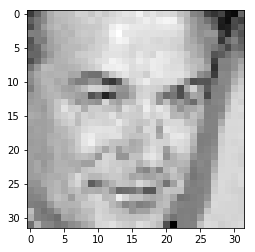

In [154]:
#view one image
plt.imshow(x_test[:,:,0],cmap="gray")
x_test[:,:,0].view()

array([[ 32,  27,  96],
       [ 30,  76,  67],
       [ 44,  74,  92],
       [ 46,  99,  82],
       [100, 117,  91],
       [ 74, 105,  99],
       [106, 123, 118],
       [119, 128, 141],
       [117, 129, 152],
       [121, 143, 159],
       [123, 151, 170],
       [127, 166, 177],
       [142, 177, 181],
       [150, 182, 177],
       [161, 182, 185],
       [176, 182, 181],
       [183, 183, 184],
       [182, 182, 183],
       [183, 183, 185],
       [182, 180, 182],
       [183, 183, 180],
       [183, 181, 177],
       [183, 182, 178],
       [183, 183, 183],
       [183, 180, 185],
       [181, 179, 184],
       [180, 177, 176],
       [183, 181, 178],
       [180, 180, 178],
       [180, 180, 178],
       [181, 179, 180],
       [179, 181, 184]], dtype=uint8)

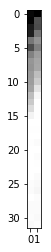

In [164]:
#check first and last pixel of first image, see if you're interpreting x_test.view() correctly
plt.imshow(x_test[:,29:31,0],cmap="gray")
x_test[:,29:32,0].view()

#seems like columns of the view of a single image
#and w.r.t to the entire dataset, looks like..

array([[ 92, 110, 123, 149, 157, 160, 165, 168, 174, 180, 174, 182, 185,
        190, 187, 186, 192, 199, 192, 200, 204, 202, 178, 155, 137, 123,
        106,  87,  42,  30,  76,  67],
       [ 77, 108, 136, 153, 161, 155, 162, 167, 169, 170, 172, 180, 198,
        206, 201, 194, 194, 193, 191, 193, 194, 192, 188, 162, 140, 124,
        125,  95,  40,  44,  74,  92]], dtype=uint8)

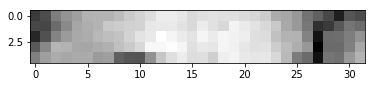

In [160]:
plt.imshow(x_test[5:10,:,0],cmap="gray")
x_test[1:3,:,0].view()

In [165]:
#flatten image using np.ndarray.flatten
flattened_example = x_test[:,:,0].flatten()

In [168]:
flattened_example[31]

96

In [ ]:
#x0
#x
#y
#T
#a

In [ ]:
#hypothesis function
#weighted sum of pixel intensities + constant

In [ ]:
#initialize weights